In [6]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import os

In [2]:
LR = 0.02
EPOSCH = 5
DOWNLOAD_MNIST = False
BATCH_SIZE = 50

In [3]:
if not os.path.exists('./data') or not os.listdir('./data'):
    DOWNLOAD_MNIST = True

In [5]:
train_data = MNIST(
    root="data",
    train=True,
    download=DOWNLOAD_MNIST,
    transform=ToTensor(),
)

test_data = MNIST(
    root="data",
    train=False,
    download=DOWNLOAD_MNIST,
    transform=ToTensor(),
)

In [7]:
train_loader = DataLoader(
    train_data, batch_size=BATCH_SIZE)

test_loader = DataLoader(
    test_data,batch_size=BATCH_SIZE
)

In [13]:
for test, train in zip(train_loader, test_loader):
    x0, y0 = test
    x1, y1 = train
    print(x0.shape, y0.shape)
    print(x1.shape, y1.shape)
    break

torch.Size([50, 1, 28, 28]) torch.Size([50])
torch.Size([50, 1, 28, 28]) torch.Size([50])


In [20]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.lstm = nn.LSTM(
            input_size=28,
            hidden_size=64,
            num_layers=1,
            batch_first=True,
        )
        self.out = nn.Linear(64, 10)
    def forward(self, x):
        out, (x_, y_) = self.lstm(x, None)
        output = self.out(out[:, -1, :])
        return output

In [21]:
lstm = Net()
print(lstm)

Net(
  (lstm): LSTM(28, 64, batch_first=True)
  (out): Linear(in_features=64, out_features=10, bias=True)
)


In [22]:
optim = torch.optim.Adam(lstm.parameters(), lr=LR)
loss_fn = torch.nn.CrossEntropyLoss()

In [23]:
def train(dataloader, model, loss_fn, optim):
    size = len(dataloader.dataset)
    model.train()
    for step, (x, y) in enumerate(dataloader):
        x = x.view(-1, 28, 28)
        y_pred = model(x)
        loss = loss_fn(y_pred, y)
        optim.zero_grad()
        loss.backward()
        optim.step()

        if step % 100 == 0:
            loss, current = loss.item(), step * len(x)
            print( f'loss {loss:>7f} {current:>5d}/{size:>5d}')



In [24]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for x,y in dataloader:
            x = x.view(-1, 28, 28)
            y_pred = model(x)
            test_loss += loss_fn(y_pred, y).item()
            correct += (y_pred.argmax(1) == y).type(torch.float).sum().item()
        test_loss /= num_batches
        correct /= size
        print(f'test error \n acc {(100*correct):>0.1f}% avg_loss {test_loss:>8f} \n')


In [25]:
for i in range(EPOSCH):
    print(f'EPOSCH {i+1}')
    train(train_loader, lstm, loss_fn, optim)
    test(test_loader, lstm, loss_fn)

EPOSCH 1
loss 2.298739     0/60000
loss 0.659461  5000/60000
loss 0.714092 10000/60000
loss 0.293851 15000/60000
loss 0.531091 20000/60000
loss 0.148773 25000/60000
loss 0.067063 30000/60000
loss 0.366107 35000/60000
loss 0.144693 40000/60000
loss 0.362255 45000/60000
loss 0.050549 50000/60000
loss 0.182360 55000/60000
test error 
 acc 90.3% avg_loss 0.320079 

EPOSCH 2
loss 0.235053     0/60000
loss 0.197910  5000/60000
loss 0.439672 10000/60000
loss 0.055559 15000/60000
loss 0.246277 20000/60000
loss 0.163662 25000/60000
loss 0.166643 30000/60000
loss 0.359554 35000/60000
loss 0.145785 40000/60000
loss 0.404661 45000/60000
loss 0.030922 50000/60000
loss 0.082342 55000/60000
test error 
 acc 93.3% avg_loss 0.220855 

EPOSCH 3
loss 0.243030     0/60000
loss 0.193756  5000/60000
loss 0.378277 10000/60000
loss 0.018919 15000/60000
loss 0.348544 20000/60000
loss 0.069202 25000/60000
loss 0.604330 30000/60000
loss 0.630688 35000/60000
loss 0.461461 40000/60000
loss 1.069266 45000/60000
los

5 tensor(5)


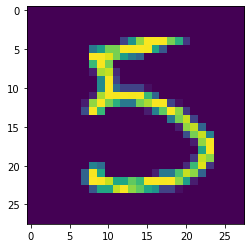

In [28]:
testx, testy = test_data[15][0], test_data[15][1]

np_testx = testx[0].numpy()
plt.imshow(np_testx)
# testx = x.view(-1, 28, 28)
test_pred_y = lstm(testx)
argmax_pred_y = torch.argmax(test_pred_y)
print(testy, argmax_pred_y)